# Epsilon Greedy explained

An easy-to-implement, effective, and widely used approach to the exploration-exploitation problem is what is called $\epsilon$-greedy actions. This approach suggests, most of the time, greedily taking the action that is the best according to the rewards observed by that point in the experiment (that is, with 1-$\epsilon$ probability); but once in a while (that is, with $\epsilon$ probability), take a random action regardless of the action performances. Here, $\epsilon$ is a number between 0 and 1, usually closer to zero (for example, 0.1) to "exploit" in most decisions. This way, the method allows continuous exploration of the alternative actions throughout the experiment.

# Application to the online advertising scenario

The best performing ad with epsilon 0.1 is A
No. of times optimal ad was shown is 8378
No. of times explored: 1019
No. of times exploited: 8981
The best performing ad with epsilon 0.01 is A
No. of times optimal ad was shown is 9451
No. of times explored: 94
No. of times exploited: 9906
The best performing ad with epsilon 0.03 is A
No. of times optimal ad was shown is 9725
No. of times explored: 316
No. of times exploited: 9684


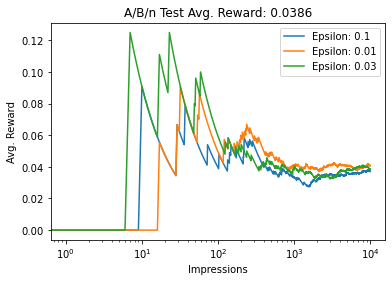

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class BernoulliBandit(object):
    def __init__(self, p):
        self.p = p
    
    def display_ad(self):
        reward = np.random.binomial(n=1, p=self.p)
        return reward
    
bandit_probs = [0.04, 0.016, 0.02, 0.028, 0.031] #These probabilities represent the reward distribution per each bandit (ad here).

ads = [BernoulliBandit(i) for i in bandit_probs]

n_trails = 10000
n_ads = len(ads)
epsilons = [0.1, 0.01, 0.03]


for epsilon in epsilons:
    n_optimal_pulls = 0
    n_explored = 0
    n_exploited = 0
    Q = np.zeros(n_ads)  # Q, action values
    N = np.zeros(n_ads)  # N, total impressions
    total_reward = 0
    avg_rewards = []  # Save average rewards over time

    for i in range(n_trails):
        p = np.random.random()
        if p < epsilon:
            n_explored+=1
            ad_chosen = np.random.randint(n_ads)
        else:
            ad_chosen = np.argmax(Q)
            n_exploited+=1
        
        if ad_chosen == np.argmax(bandit_probs):
                n_optimal_pulls +=1

        R = ads[ad_chosen].display_ad()  # Observe reward
        N[ad_chosen] += 1
        Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
        total_reward += R
        avg_reward_so_far = total_reward / (i + 1)
        avg_rewards.append(avg_reward_so_far)

    best_ad_index = np.argmax(Q)  # Find the best action
    print("The best performing ad with epsilon {} is {}".format(epsilon, chr(ord('A') + best_ad_index)))
    print("No. of times optimal ad was shown is", n_optimal_pulls)
    print("No. of times explored:", n_explored)
    print("No. of times exploited:", n_exploited)
    
    df_reward_comparison = pd.DataFrame(avg_rewards, columns=['A/B/n'])
    df_reward_comparison['A/B/n'].plot(title="A/B/n Test Avg. Reward: {:.4f}"
                                    .format(avg_reward_so_far), label = "Epsilon: {}".format(epsilon))
    plt.xlabel("Impressions")
    plt.ylabel("Avg. Reward")
    plt.xscale('log')
plt.legend()
plt.show()

From the above graph it is very clear that, with higher epsilon value, the agent explores more. While all the agents with different epsilon values converge to the similar final average reward and decide on the same best performing ad, the difference in the time taken for convergence is significant.

The number of optimal pulls (once converged) is significantly more for lower epsilon values. On the other hand, the noise (fluctuations) in case of epsilon=0.1 are significantly more.

# Advantages and disadvantages of $\epsilon$-greedy actions

* **ε-greedy actions and A/B/n tests are similarly inefficient and static in allocating the exploration budget**. The ε-greedy approach, too, fails to write off actions that are clearly bad and continues to allocate the same exploration budget to each alternative. For example, halfway through the experiment, it is pretty clear that ad A is performing pretty poorly. It would have been more efficient to use the exploration budget to try to differentiate between the rest of the alternatives to identify the best. On a related note, if a particular action is under-explored/over-explored at any point, the exploration budget is not adjusted accordingly.

One potential solution to this problem can be the use of decaying epsilon where epsilon is a function of time step.

$$
\epsilon(t) \propto 1/t, \enspace \epsilon(t) = max(\epsilon_0-kt, \epsilon_{min}), \enspace \epsilon(t) = \epsilon_0 \alpha^t, \enspace \epsilon(t)=\frac{a}{log(bt+c)}
$$

where $t$ is the time step.

* **With ε-greedy actions, exploration is continuous, unlike in A/B/n testing**. This means if the environment is not stationary, the ε-greedy approach has the potential to pick up the changes and modify its selection of the best alternative. In stationary environments, though, we can expect the A/B/n testing and the ε-greedy approach to perform similarly since they are very similar in nature, except when they do the exploration.

* **The ε-greedy actions approach could be made more efficient by dynamically changing the ε value**. For example, you could start with a high ε value to explore more at the beginning and gradually decrease it to exploit more later. This way, there is still continuous exploration, but not as much as at the beginning when there was no knowledge of the environment.

* **The ε-greedy actions approach could be made more dynamic by increasing the importance of more recent observations**. In the standard version, the values in the preceding are calculated as simple averages. Remember that, in dynamic environments, we could instead use the following formula:

$$Q_{n+1}(a) = Q_n(a)+\alpha (R_n(a)-Q_n(a))$$

This would exponentially diminish the weights of the older observations and enable the approach to detect the changes in the environment more easily.

* **Modifying the ε-greedy actions approach introduces new hyperparameters, which need to be tuned**. Both of the previous suggestions – gradually diminishing ε and using exponential smoothing for Q – come with additional hyperparameters, and it may not be obvious what values to set these to. Moreover, incorrect selection of these hyperparameters may lead to worse results than what the standard version would yield.

Keep in mind that ε-greedy actions are still too static, and we can do better. Consecutive sections discuss methods that improve upon ε-greedy.

# References

* https://www.packtpub.com/product/mastering-reinforcement-learning-with-python/9781838644147

_This entire page is a chapter referenced from the above link. EssentialAI does not claim ownership of the content in any way._